In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
from numpy.random import normal
import numpy as np
from sklearn.linear_model import LinearRegression
import math

In [3]:
# Pick a random event to occurr based on the probability of
# Each happening

# Binning Function

def binning(dictionary, binsize):
    binned = {}
    bins = {}
    sizes = []
    for i in range(5000):
        if i != 0:
            sizes.append(i*binsize)
    for size in sizes:
        binned[size] = 0
        
    for value in dictionary:
        floe_count = dictionary[value]
        opt_out = 0
        for size in sizes:
            if opt_out == 1:
                continue
            elif value < size and value > 0:
                binned[size] += floe_count
                opt_out = 1
    for key in binned:
        if binned[key] > 0:
            bins[key] = binned[key]
        
    return bins


In [4]:
# Testing the Binning function
test = {1:3, 2:5, 6:3, 11:1}

binning(test, 5)
# looks good

{5: 8, 10: 3, 15: 1}

## Main Model (probability based on amount available)

In [14]:
# Set Parameters For:
# 0. Fracture Rate
rfrac2 = 0.3
# 1. Weld Rate
rweld2 = 0.2
# 2. No event (1- (Weld+Fract))
rnone2 = 0.5

# Pick a random event to occurr based on the probability of
# Each happening

sampleList = [0, 1, 2]

# list of random events, where num is how many events to pick
def random_event(num):
    randomList = random.choices(
      sampleList, weights=(rnone2, rfrac2, rweld2), k=num)
    return(randomList)


def pick_floe(fsd):
    randomPick = random.choices(
      list(fsd.keys()), weights=(list(fsd.values())), k=1)
    return randomPick[0]




In [30]:

def fsd_function():

    fsd_dict2 = {20000:1}
    

# this value is for the weld loop
    opt_out = 0

# THIS MODEL IS ASSUMING THE PROBABILITY OF CHOOSING A SIZE IS BASED ON AMOUNT 

    events = random_event(80000)
    for val in events:
        # define all the possible sizes
        keys = list(fsd_dict2.keys())
        sizes =[]
        for key in keys:
            if fsd_dict2[key] > 0:
                sizes.append(key)
    
        if val == 0:
            continue
        elif val == 1:   # Fracture occurs
            # choose a place to break 
            # Randomly chose a place to have a fracture
            # and Randomly choose how many it will break in to (4, 16?)

            choice = float(pick_floe(fsd_dict2))
            new_size = choice/2
            
        # remove 1 from the bigger value and add 4 to the broken value
            fsd_dict2[choice] -= 1
            
            if new_size in fsd_dict2:
                    fsd_dict2[new_size] += 4
            else:
                fsd_dict2[new_size] = 4
                

        elif val == 2:   # Weld occurs
            # choose a place to weld
            choice = float(pick_floe(fsd_dict2))

            
            if fsd_dict2[choice] < 4:
                # check and see how many there are in our choice
                choice_total = fsd_dict2[choice]
            
                # see how many floes we need
                needed_floes = (4 - choice_total)
            
                for i in range(1000):
                    if opt_out == 1:
                        continue
                
                # check if a sligtly larger floe is available to weld 
                    elif (choice + i) in fsd_dict2 and fsd_dict2[(choice + i)] > 0:
                        if fsd_dict2[choice + i] >= needed_floes:
                            fsd_dict2[choice + i] -= needed_floes
                            fsd_dict2[choice] = 0
                            opt_out = 1
                    
                    # change the vals in the dictionary
                            if needed_floes == 3:
                                new_size = (choice + i)*2
                                if new_size in fsd_dict2:
                                    fsd_dict2[new_size] += 1

                                else:
                                    fsd_dict2[new_size] = 1
                            else: 
                                new_size = (choice + i) + choice
                                if new_size in fsd_dict2:
                                    fsd_dict2[new_size] += 1

                                else:
                                    fsd_dict2[new_size] = 1
    return fsd_dict2
# the output of this function is a dictionary of the fsd



## Finding averages

In [7]:
#run trials function and get the averages

def fsd_trials(trial_amount, binsize):
    
    averages = {}
    total = {}
    for i in range(trial_amount):
        # calls fsd function to get a dict
        fsd = fsd_function()
        for value in fsd:
            if value in averages:
                averages[value].append(fsd[value])
            else:
                averages[value] = []
                averages[value].append(fsd[value])

    for value in averages:
        total = 0
        for number in averages[value]:
            total += number
        averages[value] = (total/trial_amount)
            
        
    
    # binning the trials with binning function
    bin_dict = binning(averages, binsize)
    return bin_dict


In [31]:
trial_dict = fsd_trials(5, 200)

Max value element :  70980.7
Min value element :  0.3
Keys:  dict_keys([200, 400, 800, 1400, 2600, 5200, 10200]) 
Values dict_values([70980.7, 540.0, 206.1, 62.9, 16.3, 2.5, 0.3])


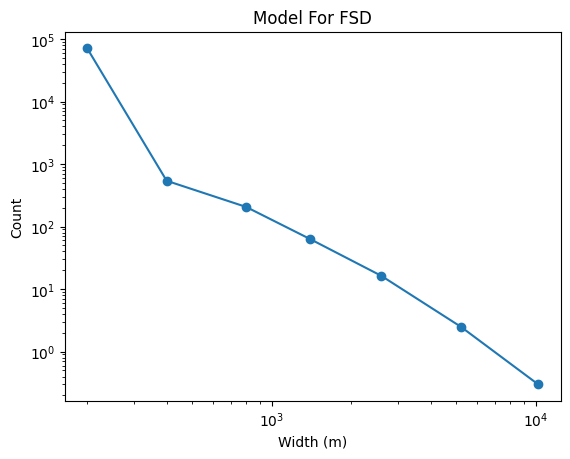

In [27]:
import numpy as np

sizes = list(trial_dict.keys())
counts = list(trial_dict.values())
total_count = sum(counts)


plt.scatter(sizes, counts)
plt.plot(sizes, counts)
plt.xlabel("Width (m)")
plt.ylabel("Count")
plt.title("Model For FSD")
plt.yscale("log")
plt.xscale("log")
#count, bins, ignored = plt.line(sizes, result)
print ("Max value element : ", max(counts))
print("Min value element : ", min(counts))
print("Keys: ", trial_dict.keys(), "\nValues", trial_dict.values())

{400: 442.4, 800: 160.2, 1400: 55.6, 2600: 14.0, 5200: 4.6, 10200: 0.6}
[400, 10200] [442.4, 0.6]
Max value element :  442.4
Min value element :  0.6


dict_keys([400, 800, 1400, 2600, 5200, 10200])

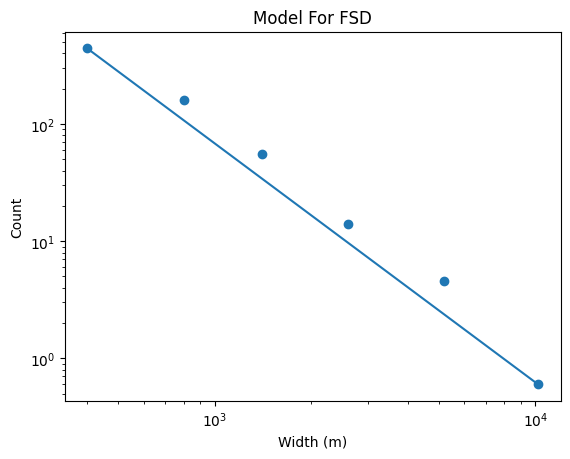

In [32]:
upper_dict = {}
for key in trial_dict:
    if key >= 300:
        upper_dict[key] = trial_dict[key]
        
print(upper_dict)
        
sizes = list(upper_dict.keys())
counts = list(upper_dict.values())
slope1 = []
slope1.append(sizes[0])
slope1.append(sizes[-1])

slope2 = []
slope2.append(counts[0])
slope2.append(counts[-1])
total_count = sum(counts)

print(slope1, slope2)


plt.scatter(sizes, counts)
plt.plot(slope1, slope2)
plt.xlabel("Width (m)")
plt.ylabel("Count")
plt.title("Model For FSD")
plt.yscale("log")
plt.xscale("log")
#count, bins, ignored = plt.line(sizes, result)
print ("Max value element : ", max(counts))
print("Min value element : ", min(counts))
upper_dict.keys()

In [12]:
# install by `pip install powerlaw`
import powerlaw
import matplotlib.pyplot as plt

def check_power_law_distribution(size_distribution):
    sizes = list(size_distribution.keys())
    counts = list(size_distribution.values())

    # Fit power law model
    fit = powerlaw.Fit(sizes, xmin=min(sizes))

    # Plot the distribution and power law fit
    fit.plot_ccdf(color='r', linewidth=2)
    fit.power_law.plot_ccdf(color='g', linestyle='--', ax=plt.gca())

    # Perform goodness-of-fit test
    R, p_value = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)

    if p_value < 0.05:
        print("The size distribution is not a good fit for a power law distribution.", p_value)
    else:
        print("The size distribution is a good fit for a power law distribution.", p_value)

    plt.xlabel('Node Size')
    plt.ylabel('Complementary Cumulative Distribution Function (CCDF)')
    plt.title('Size Distribution and Power Law Fit')
    plt.show()

The size distribution is a good fit for a power law distribution. 0.8887071750726947


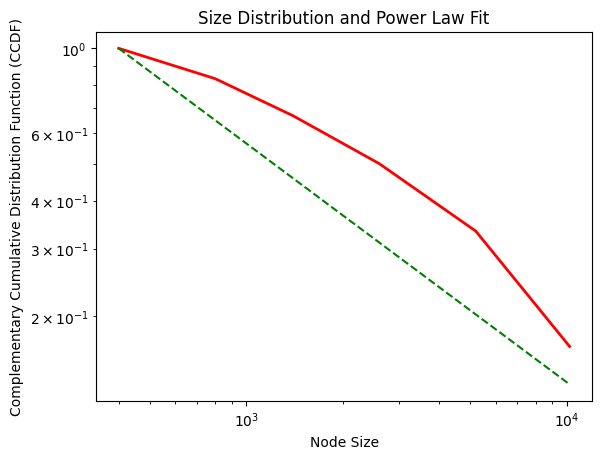

In [33]:
check_power_law_distribution(upper_dict)

## Fracture rate is dependant on size

In [ ]:
# chooses a floe from the FSD dictionary absed on a fracture rate given

def fracture_rates(dictionary, f_rate):
    weights = []
    total = sum(dictionary.values())
    for key in dictionary:
        val = dictionary[key]
        fraction = (total - (key*val))/total
        rate = (fraction * f_rate )
        weights.append(rate)
    randomList = random.choices(
      list(dictionary.keys()), weights=(weights), k=1)
    return randomList[0]

In [ ]:
# Set Parameters For:
# 0. Fracture Rate
rfrac2 = .05
# 1. Weld Rate
rweld2 = .0
# 2. No event (1- (Weld+Fract))
rnone2 = .95

# Pick a random event to occurr based on the probability of
# Each happening

sampleList = [0, 1, 2]

# list of random events, where num is how many events to pick
def random_event2(num):
    randomList = random.choices(
      sampleList, weights=(rnone2, rfrac2, rweld2), k=num)
    return(randomList)


def pick_floe(fsd):
    randomPick = random.choices(
      list(fsd.keys()), weights=(list(fsd.values())), k=1)
    return randomPick[0]

In [ ]:

def fsd_function_frac():
    # first make a dictionary of a fsd (from normal distribution)
    #fsd_dict2 = {10000:1}
    fsd_dict2 = {10000:1}
    #data = normal(loc=3400, scale=925, size=1000)
    #fsd2 = data.tolist()
    
    #for value in fsd2:
       # if round(value) in fsd_dict2:
            #fsd_dict2[round(value)] += 1
        #else:
            #fsd_dict2[round(value)] = 1

# this value is for the weld loop
    opt_out = 0

# THIS MODEL IS ASSUMING THE PROBABILITY OF CHOOSING A SIZE IS BASED ON AMOUNT 

    events = random_event2(8000)
    for val in events:
        # define all the possible sizes
        sizes =[]
        for key in fsd_dict2:
            if fsd_dict2[key] > 0:
                sizes.append(item)
                
    # nothing happens
        if val == 0:
            continue
            
        if val == 1:   # Fracture occurs
            # choose a place to break 
            #choice = float(fracture_rates(fsd_dict2, rfrac2))
            choice = float(pick_floe(fsd_dict2))
     
            # and Randomly choose how many it will break in to (4, 16?)

            options = [4,16]
            #split = float(random.choice(options))
            split = 4
            if split == 4:    
                new_size = choice/2
        
        # remove 1 from the bigger value and add 4 to the broken value
                fsd_dict2[choice] -= 1
            
                if new_size in fsd_dict2:
                    fsd_dict2[new_size] += 4
                else:
                    fsd_dict2[new_size] = 4
                
            if split == 16:
                new_size = choice/4
                fsd_dict2[choice] -= 1
                if new_size in fsd_dict2:
                    fsd_dict2[new_size] += 16
                else:
                    fsd_dict2[new_size] = 16


        if val == 2:   # Weld occurs
            # choose a place to weld
            # OR Randomly choose a place to have a weld and randomly choose
            # how many pieces will weld together (4-16?)
            choice = float(pick_floe(fsd_dict2))

            
            if fsd_dict2[choice] < 4:
                # check and see how many there are in our choice
                choice_total = fsd_dict2[choice]
            
                # see how many floes we need
                needed_floes = (4 - choice_total)
            
                for i in range(20):
                    if opt_out == 1:
                        continue
                
                # check if a sligtly larger floe is available to weld 
                    if (choice + i) in fsd_dict2 and fsd_dict2[(choice + i)] > 0:
                        if fsd_dict2[choice + i] >= needed_floes:
                            fsd_dict2[choice + i] -= needed_floes
                            fsd_dict2[choice] = 0
                            opt_out = 1
                    
                    # change the vals in the dictionary
                            if needed_floes >=3:
                                new_size = (choice + i)*2
                                if new_size in fsd_dict2:
                                    fsd_dict2[new_size] += 4

                                else:
                                    fsd_dict2[new_size] = 4
                            else: 
                                new_size = (choice + i)+ choice
                                if new_size in fsd_dict2:
                                    fsd_dict2[new_size] += 4

                                else:
                                    fsd_dict2[new_size] = 4
    return fsd_dict2
# the output of this function is a dictionary of the fsd



In [61]:
def fsd_trials_frac(trial_amount, binsize):
    
    averages = {}
    total = {}
    for i in range(trial_amount):
        # calls fsd function to get a dict
        fsd = fsd_function_frac()
        for value in fsd:
            if value in averages:
                averages[value].append(fsd[value])
            else:
                averages[value] = []
                averages[value].append(fsd[value])

    for value in averages:
        total = 0
        for number in averages[value]:
            total += number
            averages[value] = total/trial_amount
            
        
    
    # binning the trials with binning function
    bin_dict = binning(averages, binsize)
    return bin_dict

In [ ]:
trial_dict2 = fsd_trials_frac(20, 1)

In [ ]:
sizes = list(trial_dict2.keys())
counts = list(trial_dict2.values())
total_count = sum(counts)


plt.scatter(sizes, counts)
plt.plot(sizes, counts)
plt.xlabel("Width (m)")
plt.ylabel("Count")
plt.title("Model For FSD")
#plt.yscale("log")
#plt.xscale("log")
#count, bins, ignored = plt.line(sizes, result)
print ("Max value element : ", max(counts))
print("Min value element : ", min(counts))

In [ ]:
check_power_law_distribution(trial_dict2)